<a href="https://colab.research.google.com/github/jillianhaig/DS-4002/blob/main/CS1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/General Social Survey, 2022.csv')

In [ ]:
print(df.columns)

Index(['YEAR', 'ID', 'WRKSTAT', 'HRS1', 'HRS2', 'EVWORK', 'WRKSLF', 'OCC10',
       'PRESTG10', 'INDUS10',
       ...
       'WTSSPS_NEXT', 'WTSSNRPS_NEXT', 'WTSSPS_AS', 'WTSSNRPS_AS', 'I_AGE',
       'I_ATTEND', 'I_INCOME', 'I_PARTYID', 'I_RELIGION', 'I_SEX'],
      dtype='object', length=1150)


In [ ]:
# RACE, PARTYID, AGE, SEX, ABLEGAL, ABMORAL, ABANYG, ABBELIEF, RELIG, EDUC

In [28]:
df = df[['RACE', 'PARTYID', 'AGE', 'SEX', 'ABMORAL', 'ABANYG', 'ABBELIEF', 'RELIG', 'EDUC']]

In [32]:
relevant_columns = ['RACE', 'PARTYID', 'AGE', 'SEX', 'ABMORAL', 'ABBELIEF', 'RELIG', 'EDUC']
data = df[relevant_columns]

In [33]:
data.dropna(inplace=True)  # or use other imputation methods

<ipython-input-33-b6880a986cdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # or use other imputation methods


In [35]:
data = pd.get_dummies(data, columns=['RACE', 'PARTYID', 'SEX', 'ABMORAL', 'RELIG', 'EDUC'], drop_first=True)

In [36]:
X_abbelief = data.drop('ABBELIEF', axis=1)  # Features
y_abbelief = data['ABBELIEF']  # Target

In [38]:
from sklearn.model_selection import train_test_split

# Split for ABBELIEF
X_train_abbelief, X_test_abbelief, y_train_abbelief, y_test_abbelief = train_test_split(X_abbelief, y_abbelief, test_size=0.3, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

# For ABBELIEF
model_abbelief = DecisionTreeClassifier(random_state=42)
model_abbelief.fit(X_train_abbelief, y_train_abbelief)

DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For ABBELIEF
y_pred_abbelief = model_abbelief.predict(X_test_abbelief)
print("ABBELIEF Accuracy:", accuracy_score(y_test_abbelief, y_pred_abbelief))
print(classification_report(y_test_abbelief, y_pred_abbelief))
print(confusion_matrix(y_test_abbelief, y_pred_abbelief))

ABBELIEF Accuracy: 0.4971751412429379
              precision    recall  f1-score   support

         1.0       0.73      0.65      0.69       140
         2.0       0.15      0.13      0.14        23
         3.0       0.31      0.37      0.34        79
         4.0       0.12      0.11      0.11        28
         5.0       0.05      0.10      0.07        10
         6.0       0.68      0.66      0.67        74

    accuracy                           0.50       354
   macro avg       0.34      0.34      0.34       354
weighted avg       0.52      0.50      0.51       354

[[91  7 32  3  4  3]
 [ 8  3  6  3  1  2]
 [15  5 29 13  7 10]
 [ 3  5 12  3  1  4]
 [ 1  0  4  0  1  4]
 [ 6  0 10  3  6 49]]


In [41]:
import matplotlib.pyplot as plt

# Feature importance for ABBELIEF
importance_abbelief = model_abbelief.feature_importances_
indices_abbelief = np.argsort(importance_abbelief)[::-1]

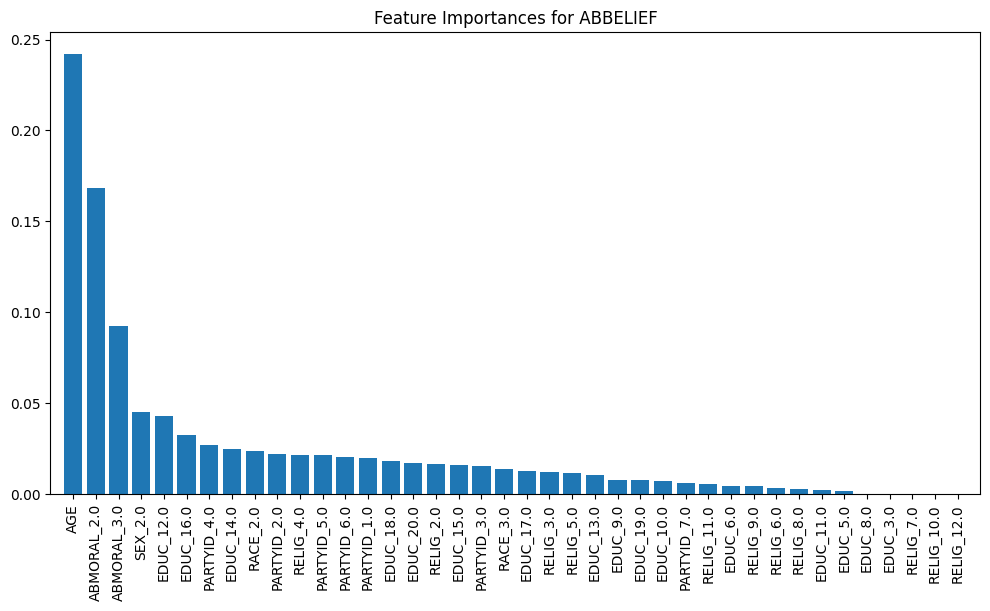

In [42]:
# Plot feature importance for ABBELIEF
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for ABBELIEF")
plt.bar(range(X_abbelief.shape[1]), importance_abbelief[indices_abbelief], align="center")
plt.xticks(range(X_abbelief.shape[1]), X_abbelief.columns[indices_abbelief], rotation=90)
plt.xlim([-1, X_abbelief.shape[1]])
plt.show()